# Practica con sensor de turbidez virtual.
## Hemos simulado el sensor de turbidez y las revoluciones en RPM en la hoja de calculo 

In [1]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [18]:
import xlrd
book = xlrd.open_workbook("Data_Example.xlsx")
sheetSample = book.sheet_by_name("sampleDB")

In [19]:
print("---- Sensor turbidez (NTU) ----  ----------------------- MOTOR (RPM) ------------------------")
for row_index in range(7,28): #reading first columns
    Sensor1, Sensor2, Sensor3, Sensor4, Motor1, Motor2, Motor3, Motor4, Motor5, Motor6, Motor7, Motor8 = sheetSample.row_values(row_index, start_colx=0, end_colx=12)
    print(round(Sensor1,2), "	", round(Sensor2,2), "	", round(Sensor3,2), "	", round(Sensor4,2), "	", round(Motor1), "	", round(Motor2), "	", round(Motor3), "	", round(Motor4), "	", round(Motor5), "	", round(Motor6), "	", round(Motor7), "	", round(Motor8))

---- Sensor turbidez (NTU) ----  ----------------------- MOTOR (RPM) ------------------------
1.0 	 2.0 	 3.0 	 4.0 	 1 	 2 	 3 	 4 	 5 	 6 	 7 	 8
0.83 	 0.13 	 0.05 	 0.9 	 907 	 907 	 571 	 571 	 533 	 533 	 941 	 941
0.02 	 0.06 	 0.72 	 0.38 	 519 	 519 	 538 	 538 	 855 	 855 	 691 	 691
0.82 	 0.6 	 0.79 	 0.01 	 903 	 903 	 797 	 797 	 888 	 888 	 514 	 514
0.57 	 0.16 	 0.55 	 0.31 	 783 	 783 	 586 	 586 	 773 	 773 	 658 	 658
0.45 	 0.02 	 0.1 	 0.35 	 725 	 725 	 519 	 519 	 557 	 557 	 677 	 677
0.47 	 0.36 	 0.17 	 0.36 	 735 	 735 	 682 	 682 	 591 	 591 	 682 	 682
0.38 	 0.49 	 0.73 	 0.47 	 691 	 691 	 744 	 744 	 859 	 859 	 735 	 735
0.94 	 0.01 	 0.27 	 0.47 	 960 	 960 	 514 	 514 	 639 	 639 	 735 	 735
0.26 	 0.77 	 0.25 	 0.23 	 634 	 634 	 879 	 879 	 629 	 629 	 619 	 619
0.54 	 0.36 	 0.86 	 0.01 	 768 	 768 	 682 	 682 	 922 	 922 	 514 	 514
0.46 	 0.12 	 0.28 	 0.54 	 730 	 730 	 567 	 567 	 643 	 643 	 768 	 768
0.47 	 0.52 	 0.65 	 0.07 	 735 	 735 	 7

In [20]:
Sensor1 = sheetSample.col_values(0)[8:]
Sensor2 = sheetSample.col_values(1)[8:]
Sensor3 = sheetSample.col_values(2)[8:]
Sensor4 = sheetSample.col_values(3)[8:]

Motor1 = sheetSample.col_values(4)[8:]
Motor2 = sheetSample.col_values(5)[8:]
Motor3 = sheetSample.col_values(6)[8:]
Motor4 = sheetSample.col_values(7)[8:]
Motor5 = sheetSample.col_values(8)[8:]
Motor6 = sheetSample.col_values(9)[8:]
Motor7 = sheetSample.col_values(10)[8:]
Motor8 = sheetSample.col_values(11)[8:]

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

dataMotor12 = {'Sensor': Sensor1, 'Motor1': Motor1, 'Motor2': Motor2}
dfMotor12 = pd.DataFrame(dataMotor12)

dfMotor12['Sensor'] = pd.to_numeric(dfMotor12['Sensor'])
dfMotor12['Motor1'] = pd.to_numeric(dfMotor12['Motor1'])

dfMotor12.replace('',None, regex=True)
dfMotor12.dropna(inplace=True)

train, test = train_test_split(dfMotor12, test_size=0.2)

print("Datos para entrenar: ",len(train))
print("Datos para probar: ",len(test))

#Model and train Motor12
X_trainMotor12 = dfMotor12.Sensor.apply(lambda x: [x]).tolist()
y_trainMotor12 = dfMotor12['Motor1'].tolist()

#print(X_trainMotor12)
#print(y_trainMotor12)

model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainMotor12, y_trainMotor12)

X_Test = test.Sensor.apply(lambda x: [x]).tolist()
y_predictedMotor12 = model.predict(X_Test)
y_True = test['Motor1']

print('exactitud: ',r2_score(y_True, y_predictedMotor12))

y_FullPredictedMotor1 = model.predict(dfMotor12.Sensor.apply(lambda x: [x]).tolist())

Datos para entrenar:  80
Datos para probar:  21
exactitud:  0.9999934722141469


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

dataMotor34 = {'Sensor': Sensor2, 'Motor3': Motor3, 'Motor4': Motor4}
dfMotor34 = pd.DataFrame(dataMotor34)

dfMotor34['Sensor'] = pd.to_numeric(dfMotor34['Sensor'])
dfMotor34['Motor3'] = pd.to_numeric(dfMotor34['Motor3'])

dfMotor34.replace('',None, regex=True)
dfMotor34.dropna(inplace=True)

train, test = train_test_split(dfMotor34, test_size=0.2)

print("Datos para entrenar: ",len(train))
print("Datos para probar: ",len(test))

#Model and train Motor34
X_trainMotor34 = dfMotor34.Sensor.apply(lambda x: [x]).tolist()
y_trainMotor34 = dfMotor34['Motor3'].tolist()

#print(X_trainMotor34)
#print(y_trainMotor34)

model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainMotor34, y_trainMotor34)

X_Test = test.Sensor.apply(lambda x: [x]).tolist()
y_predictedMotor34 = model.predict(X_Test)
y_True = test['Motor3']

print('exactitud: ',r2_score(y_True, y_predictedMotor34))

y_FullPredictedMotor3 = model.predict(dfMotor34.Sensor.apply(lambda x: [x]).tolist())

Datos para entrenar:  80
Datos para probar:  21
exactitud:  0.9999940652955015


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

dataMotor56 = {'Sensor': Sensor3, 'Motor5': Motor5, 'Motor6': Motor6}
dfMotor56 = pd.DataFrame(dataMotor56)

dfMotor56['Sensor'] = pd.to_numeric(dfMotor56['Sensor'])
dfMotor56['Motor5'] = pd.to_numeric(dfMotor56['Motor5'])

dfMotor56.replace('',None, regex=True)
dfMotor56.dropna(inplace=True)

train, test = train_test_split(dfMotor56, test_size=0.2)

print("Datos para entrenar: ",len(train))
print("Datos para probar: ",len(test))

#Model and train Motor56
X_trainMotor34 = dfMotor56.Sensor.apply(lambda x: [x]).tolist()
y_trainMotor34 = dfMotor56['Motor5'].tolist()

#print(X_trainMotor56)
#print(y_trainMotor56)

model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainMotor34, y_trainMotor34)

X_Test = test.Sensor.apply(lambda x: [x]).tolist()
y_predictedMotor56 = model.predict(X_Test)
y_True = test['Motor5']

print('exactitud: ',r2_score(y_True, y_predictedMotor56))

y_FullPredictedMotor5 = model.predict(dfMotor56.Sensor.apply(lambda x: [x]).tolist())

Datos para entrenar:  80
Datos para probar:  21
exactitud:  0.9999920516206514


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

dataMotor78 = {'Sensor': Sensor4, 'Motor7': Motor7, 'Motor8': Motor8}
dfMotor78 = pd.DataFrame(dataMotor78)

dfMotor78['Sensor'] = pd.to_numeric(dfMotor78['Sensor'])
dfMotor78['Motor7'] = pd.to_numeric(dfMotor78['Motor7'])

dfMotor78.replace('',None, regex=True)
dfMotor78.dropna(inplace=True)

train, test = train_test_split(dfMotor78, test_size=0.2)

print("Datos para entrenar: ",len(train))
print("Datos para probar: ",len(test))

#Model and train Motor56
X_trainMotor78 = dfMotor78.Sensor.apply(lambda x: [x]).tolist()
y_trainMotor78 = dfMotor78['Motor7'].tolist()

#print(X_trainMotor56)
#print(y_trainMotor56)

model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainMotor78, y_trainMotor78)

X_Test = test.Sensor.apply(lambda x: [x]).tolist()
y_predictedMotor78 = model.predict(X_Test)
y_True = test['Motor7']

print('exactitud: ',r2_score(y_True, y_predictedMotor78))

y_FullPredictedMotor7 = model.predict(dfMotor78.Sensor.apply(lambda x: [x]).tolist())

Datos para entrenar:  80
Datos para probar:  21
exactitud:  0.9999941627575428


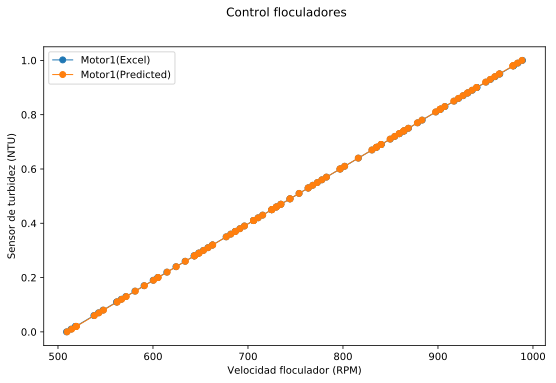

In [12]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(dfMotor12['Motor1'], dfMotor12['Sensor'], marker='o', linewidth=1, label='Motor1(Excel)')
plt.plot(y_FullPredictedMotor1, dfMotor12['Sensor'], marker='o', linewidth=1, label='Motor1(Predicted)')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Control floculadores')
ax.set_ylabel('Sensor de turbidez (NTU)')
ax.set_xlabel('Velocidad floculador (RPM)')


#Save image
plt.savefig('ML_Test_Motor1.svg', format = 'svg', dpi = 1200)
plt.savefig('ML_Test_Motor1.png')
plt.savefig('ML_Test_Motor1.eps', format = 'eps', dpi = 1200)

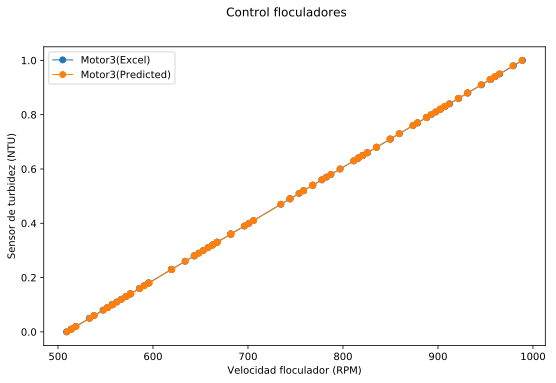

In [15]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves

plt.plot(dfMotor34['Motor3'], dfMotor34['Sensor'], marker='o', linewidth=1, label='Motor3(Excel)')
plt.plot(y_FullPredictedMotor3, dfMotor34['Sensor'], marker='o', linewidth=1, label='Motor3(Predicted)')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Control floculadores')
ax.set_ylabel('Sensor de turbidez (NTU)')
ax.set_xlabel('Velocidad floculador (RPM)')


#Save image
plt.savefig('ML_Test_Motor3.svg', format = 'svg', dpi = 1200)
plt.savefig('ML_Test_Motor3.png')
plt.savefig('ML_Test_Motor3.eps', format = 'eps', dpi = 1200)

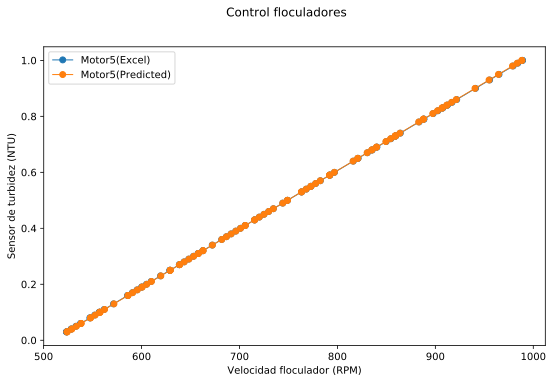

In [16]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves

plt.plot(dfMotor56['Motor5'], dfMotor56['Sensor'], marker='o', linewidth=1, label='Motor5(Excel)')
plt.plot(y_FullPredictedMotor5, dfMotor56['Sensor'], marker='o', linewidth=1, label='Motor5(Predicted)')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Control floculadores')
ax.set_ylabel('Sensor de turbidez (NTU)')
ax.set_xlabel('Velocidad floculador (RPM)')

#Save image
plt.savefig('ML_Test_Motor5.svg', format = 'svg', dpi = 1200)
plt.savefig('ML_Test_Motor5.png')
plt.savefig('ML_Test_Motor5.eps', format = 'eps', dpi = 1200)

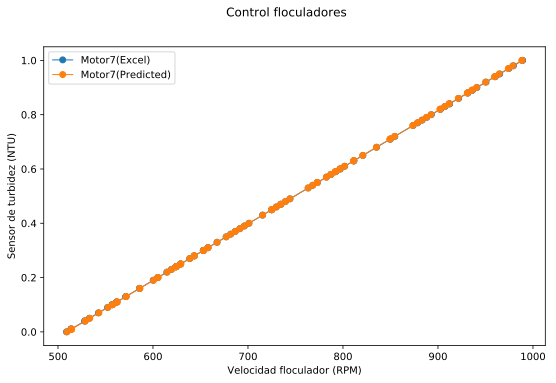

In [17]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves

plt.plot(dfMotor78['Motor7'], dfMotor78['Sensor'], marker='o', linewidth=1, label='Motor7(Excel)')
plt.plot(y_FullPredictedMotor7, dfMotor78['Sensor'], marker='o', linewidth=1, label='Motor7(Predicted)')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Control floculadores')
ax.set_ylabel('Sensor de turbidez (NTU)')
ax.set_xlabel('Velocidad floculador (RPM)')


#Save image
plt.savefig('ML_Test_Motor7.svg', format = 'svg', dpi = 1200)
plt.savefig('ML_Test_Motor7.png')
plt.savefig('ML_Test_Motor7.eps', format = 'eps', dpi = 1200)